In [1]:
from Cosmo import distance
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate



In [7]:
#setup functions to convert theta --> r_perp
d = distance(.25,.75)

def r(z1,z2,theta):
    
    x1=d.dc(z1)
    x2=d.dc(z2)
    
    th=np.sqrt(x1**2 + x2**2 - 2.*x1*x2*np.cos(np.radians(theta)))
    return th

def mu(z1,z2,theta):
    x1=d.dc(z1)
    x2=d.dc(z2)
    
    
    th= np.abs(x1**2 - x2**2)/np.sqrt((x1**2 + x2**2)**2 - (2.*x1*x2*np.cos(np.radians(theta)))**2)
    return th



def combine_w_theta(p1,p2,photoza,biasa):
    '''
    Takes in the output of w_model code
    at a particular photoz and
    combines the different moments to
    output theta, w(theta). 
    p1,p2 : bin indices
    
    photoza : array of photoz 
    
    '''
     #the term b^2 will be	 b1 b2 
     #the term b f will be 	(b1 f2 + b2 f1) / 2
     #the term f^2 will be 	f1 f2  
    #from Kwan
    #f = Omegam_a( amean )**0.55
    photoz1=photoza[p1]
    photoz2=photoza[p2]
    
    b1=biasa[p1]
    b2=biasa[p2]
    
    print (b1,b2)
    
    f1 = d.omz(photoz1)**.557
    f2 = d.omz(photoz2)**.557
    
    if p1 == p2 :
        fname='outbin_15binbin_{}.txt'.format(p1+1)
        
        
    else :
        fname='outbin_15binbin_{}c{}.txt'.format(p1+1,p2+1)
        
    print (fname)
        
    theta, w0, w2, w4  = np.loadtxt(fname, usecols=( 0,1,2,3 ), unpack=True )
    
    b2_coeff = w0
    bf_coeff = ( 2./3.*w0 + 4./3.*w2 )
    f2_coeff = ( 1/5.*w0 + 4/7.*w2 + 8/35.*w4)
    w_full = (b1*b2)*b2_coeff  +  0.5*(b1*f2 + b2*f1)*bf_coeff  +  (f1*f2)*f2_coeff
    
    return (theta,w_full)

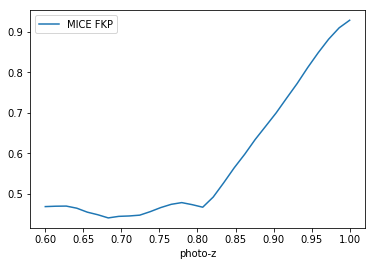

In [3]:
#use Y1 FKP weights, sigmaz,bz from Santi
y1wtfile=np.loadtxt('zwt_Y1_MICE.txt')
funcfkp= interpolate.InterpolatedUnivariateSpline(y1wtfile[:,0], y1wtfile[:,1]) 

zz=np.linspace(0.6,1.0,30)
plt.figure()
plt.plot(zz,funcfkp(zz),label='MICE FKP')
plt.legend(loc='upper left')
plt.xlabel('photo-z')
plt.show()

In [ ]:
bias_a=np.array([1.81,1.77,1.78,2.05])
photoza=np.array([0.65,0.75,0.85,0.95])

th1,wth1=combine_w_theta(0,0,photoza,bias_a)
th2,wth2=combine_w_theta(1,1,photoza,bias_a)
th3,wth3=combine_w_theta(2,2,photoza,bias_a)
th4,wth4=combine_w_theta(3,3,photoza,bias_a)

plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(th1,100.*th1*wth1,label=r'$1\times 1 $')
plt.xlim(0.2,5.)
plt.ylim(-0.2,2.2)
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')

plt.subplot(1,4,2)
plt.plot(th2,100.*th2*wth2,label=r'$2\times 2 $')
plt.xlim(0.5,5.)
plt.ylim(-0.2,2.2)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(1,4,3)
plt.plot(th3,100.*th3*wth3,label=r'$3\times 3 $')
plt.xlim(0.5,5.)
plt.ylim(-0.2,2.2)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(1,4,4)
plt.plot(th4,100.*th4*wth4,label=r'$4\times 4 $')
plt.xlim(0.5,5.)
plt.ylim(-0.2,2.2)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.show()

In [ ]:
#plot cross-correlations

th12,wth12=combine_w_theta(0,1,photoza,bias_a)
th13,wth13=combine_w_theta(0,2,photoza,bias_a)
th14,wth14=combine_w_theta(0,3,photoza,bias_a)
th23,wth23=combine_w_theta(1,2,photoza,bias_a)
th24,wth24=combine_w_theta(1,3,photoza,bias_a)
th34,wth34=combine_w_theta(2,3,photoza,bias_a)


plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.plot(th12,100.*th12*wth12,label=r'$1\times 2 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.legend(loc='upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')

plt.subplot(3,3,2)
plt.plot(th13,100.*th13*wth13,label=r'$1\times 3 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,3)
plt.plot(th14,100.*th14*wth14,label=r'$1\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,4)
plt.plot(th23,100.*th23*wth23,label=r'$2\times 3 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')
plt.legend(loc='upper right')

plt.subplot(3,3,5)
plt.plot(th24,100.*th24*wth24,label=r'$2\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.legend(loc='upper right')

plt.subplot(3,3,7)
plt.plot(th34,100.*th34*wth34,label=r'$3\times 4 $')
plt.xlim(0.2,5.)
plt.ylim(-0.5,0.85)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$100 \theta w(\theta)$')
plt.legend(loc='upper right')

plt.show()

In [16]:
dir = '/home/nil/Dropbox/w_model_code/'

#rperp_bin_edges=np.linspace(10.,230.,50)
#mid_rperp=np.array([0.5*(rperp_bin_edges[i] + rperp_bin_edges[i+1]) for i in range(len(rperp_bin_edges)-1)])

#xi_rperp=np.zeros(len(mid_rperp))

rp=np.linspace(10.,230.,250)
xi_rperp=np.zeros(len(rp))

Nbigbin=15

zph_bin_edge=np.linspace(0.6,1.0, Nbigbin+1)
midzph=[0.5*(zph_bin_edge[i] + zph_bin_edge[i+1]) for i in range(Nbigbin)]
print (midzph)

weight_sum=0.

def bias_func(z):
    bias_all=np.array([1.81,1.77,1.78,2.05])
    if 0.6 <= z <=0.7 :
        bias = bias_all[0]
        
    elif 0.7 <= z <=0.8 :
        bias = bias_all[1]
        
    elif 0.8 <= z <=0.9 :
        bias = bias_all[2]
        
    elif 0.9 <= z <=1.0 :
        bias = bias_all[3]
        
    return bias




#zz=np.array([0.6,0.65,0.75,0.85,0.95,1.0])
#ipbias= interpolate.InterpolatedUnivariateSpline(zz, bias_all) 

photoza=np.linspace(0.6,1.0,Nbigbin)
biasa=np.array([bias_func(ph) for ph in photoza])

print (biasa)
print (photoza)

[0.6133333333333333, 0.6399999999999999, 0.6666666666666666, 0.6933333333333334, 0.72, 0.7466666666666666, 0.7733333333333333, 0.8, 0.8266666666666667, 0.8533333333333333, 0.88, 0.9066666666666666, 0.9333333333333333, 0.96, 0.9866666666666667]
[1.81 1.81 1.81 1.81 1.77 1.77 1.77 1.77 1.78 1.78 1.78 2.05 2.05 2.05
 2.05]
[0.6        0.62857143 0.65714286 0.68571429 0.71428571 0.74285714
 0.77142857 0.8        0.82857143 0.85714286 0.88571429 0.91428571
 0.94285714 0.97142857 1.        ]


0.6133333333333333 0.6133333333333333
1.81 1.81
outbin_15binbin_1.txt
0 0
0.6133333333333333 0.6399999999999999
1.81 1.81
outbin_15binbin_1c2.txt
0 1
0.6133333333333333 0.6666666666666666
1.81 1.81
outbin_15binbin_1c3.txt
0 2
0.6133333333333333 0.6933333333333334
1.81 1.81
outbin_15binbin_1c4.txt
0 3
0.6133333333333333 0.72
1.81 1.77
outbin_15binbin_1c5.txt
0 4
0.6133333333333333 0.7466666666666666
1.81 1.77
outbin_15binbin_1c6.txt
0 5
0.6133333333333333 0.7733333333333333
1.81 1.77
outbin_15binbin_1c7.txt
0 6
0.6133333333333333 0.8
1.81 1.77
outbin_15binbin_1c8.txt
0 7 : empty
0.6133333333333333 0.8266666666666667
1.81 1.78
outbin_15binbin_1c9.txt
0 8 : empty
0.6133333333333333 0.8533333333333333
1.81 1.78
outbin_15binbin_1c10.txt
0 9 : empty
0.6133333333333333 0.88
1.81 1.78
outbin_15binbin_1c11.txt
0 10 : empty
0.6133333333333333 0.9066666666666666
1.81 2.05
outbin_15binbin_1c12.txt
0 11 : empty
0.6133333333333333 0.9333333333333333
1.81 2.05
outbin_15binbin_1c13.txt
0 12 : empty
0.

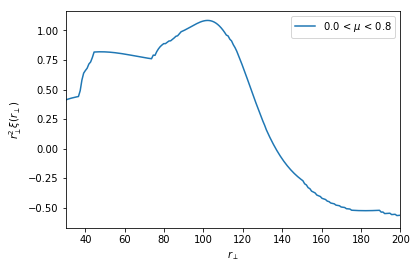

In [20]:
for i in range(0,len(midzph)):
    
    for j in range(i,len(midzph)):
    
        z1=midzph[i]
        z2=midzph[j]
        print (z1,z2)
        zmean=0.5*(z1+z2)
        
        th,wth=combine_w_theta(i,j,photoza,biasa)
        
        mmu=mu(z1,z2,th)
        
        rperp=r(z1,z2,th)*np.sqrt(1-mmu**2.)
        
        #interpolate w(theta)
        ipwtheta= interpolate.InterpolatedUnivariateSpline(th, wth) 
        
        #interpolate theta(r_perp) 
        iptheta= interpolate.InterpolatedUnivariateSpline(rperp,th)
        
        mu_min=0.
        mu_max= 0.8
        
        th_sel=[]
        wth_sel=[]
        mu_sel=[]
        rperp_sel=[]
        
        weight_sum+=funcfkp(z1)*funcfkp(z2)
        
        for ii in range(len(mmu)):
            if mu_min <= mmu[ii] <= mu_max :
                mu_sel.append(mmu[ii])
                #th_sel.append(th[ii])
                #wth_sel.append(wth[ii])
                rperp_sel.append(rperp[ii])
        
        mu_sel=np.array(mu_sel)
        #th_sel=np.array(th_sel)
        #wth_sel=np.array(wth_sel)
        rperp_sel=np.array(rperp_sel)
        
        #plt.figure()
        #plt.plot(rperp_sel,mu_sel)
        #plt.xlabel(r'$r_{\perp}$')
        #plt.ylabel(r'$\mu$')
        #plt.xlim(10.,230.)
        #plt.show()
        
        if len(mu_sel) ==0 :
            print (i,j , ': empty')
        
        else :
            print (i,j)
            for jj in range(len(rp)):
                if min(rperp_sel) <= rp[jj] <=max(rperp_sel) :
                    
                    wth_rperp=ipwtheta(iptheta(rp[jj]))
                    
                    xi_rperp[jj] += wth_rperp*funcfkp(z1)*funcfkp(z2)
                    
              
            
            #weight_sum+=funcfkp(z1)*funcfkp(z2)
        
        
                    
    
xi_rperp/=weight_sum 
            

plt.figure()
#plt.plot(rp,(rp**2)*ipxirperp(rp))
plt.plot(rp,(rp**2)*xi_rperp,label=r'{} < $\mu$ < {}'.format(mu_min,mu_max))
plt.xlabel(r'$r_{\perp}$')
plt.ylabel(r'$r_{\perp}^{2}\xi(r_{\perp})$')
plt.xlim(30,200)
plt.legend(loc='upper right')
plt.show()
            
        
            